In [27]:
# import pandas for data wrangling
import time

import pandas as pd


# import numpy for Scientific computations
import numpy as np


# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import os

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from xgboost import XGBRegressor

print(os.getcwd())
!nvidia-smi

C:\Users\Udi\Documents\GitHub\RadiationProject\beta_prediction
Mon Jul  4 18:31:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8    N/A /  N/A |   1705MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                         

In [28]:
data = 'data/ccle2.csv'
# data_x = pd.read_csv('data/train_X_beta.csv', index_col=0)
# data_y = pd.read_csv('data/train_y_beta.csv', index_col=0)
df = pd.read_csv(data, index_col=0)
df.head()
df.shape

(494, 18524)

In [29]:
X = df[['10085', '8644', '5054', '84561', '157740', '857', '401387', '22943', '11245', '79083', '2123', '54732', '55692', '8508', '5613', '3487', '6236', '8315', '3298', '56937', '4600', '1645', '11046', '3176', '23657', '3066', '51526', '2621', '4071', '245911', '58472', '1728', '63893', '26022', '55728', '63898', '439927', '51071', '23032', '135228', '9793', '93058', '51133', '316', '84141', '55964', '1803', '100287896', '10911', '23240', '9124', '770', '7554', '23596', '5507', '25845', '57695', '100506328', '23167', '347252', '2131', '6281', '83987', '8715', '91137', '716', '4613', '28968', '10544', '6921', '146225', '51057', '128866', '9060', '8717', '1911', '3995', '1734', '201725', '5352', '10346', '10016', '83882', '1875', '226', '151258', '3575', '26167', '90317', '63874', '153241', '4907', '27035', '57214', '64859', '23173', '56916', '6900', '9637', '10397', '54149', '11331', '25776', '645', '10116', '26009', '92162', '5903', '1303', '51728', '8334', '5010', '6447', '3075', '4035', '304', '285547', '22849', '64223', '9987', '796', '115584', '261729', '1382', '285600', '390', '8495', '81858', '9582', '3800', '83452', '80311', '55920', '125476', '4149', '6645', '1600', '92737', '1491', '79585', '401', '151887', '81671', '89932', '3990', '5676', '11098', '55917', '11145', '53335', '56243', '55239', '7840', '84833', '3750', '9057', '23659', '22895', '1024', '23149', '55799', '7277', '11343', '22885', '80835', '83872', '8942', '4148', '282566', '3329', '7072', '80063', '140886', '4998', '3344', '9180', '5787', '388021', '222962', '374393', '83479', '9196', '10468', '57185', '653121', '11019', '5789', '63946', '913', '492311', '84969', '375704', '80067', '116372', '112616', '84319', '11010', '3958', '126731', '53838', '148189', '148066', '27244', '970', '1876', '79053', '9849', '55741', '284207', '22949', '51142', '169841', '417', '64283', '404201', '386618', '4233', '8347', '65095', '6875', '51606', '65983', '246176', '1749', '100506542', '10038', '79029', '55214', '283352', '6482', '60436', '5471', '23598', '1825', '25907', '80318', '27125', '6368', '51634', '3166', '10730', '9646', '202299', '7145', '151254', '79727', '6867', '55228', '56919', '54988', '393', '11202', '120935', '7011', '4248', '398', '220001', '57212', '83638', '414', '1747', '100292680', '117581', '7357', '23318', '11031', '2124', '3516', '284099', '7039', '286827', '6304', '2978', '53354', '54949', '5961', '79441', '3912', '27286', '91734', '283677', '9495', '51209', '6532', '49856', '84926', '144568', '644809', '207107', '23131', '221938', '5329', '9249', '4676', '3426', '8629', '57531', '60558', '100132074', '5137', '57150', '339290', '8936', '645566', '29991', '54822', '3673', '80224', '6201', '822', '339965', '5145', '84962', '4286', '285527', '4856', '53826', '3930', '5881', '9889', '6626', '667', '10137', '6133', '140578', '6664', '1180', '84189', '1057', '6619', '125150', '90321', '392617', '1543', '339834', '8365', '80155', '10981', '26065', '6426', '26354', '10650', '166378', '4082', '1601', '26471', '79712', '80206', '100287932', '653483', '129080', '56475', '3228', '160492', '150051', '284013', '57180', '3093', '169834', '197003', '403341', '11257', '23387', '3490', '64850', '84830', '55970', '6160', '2882', '79187', '3068', '54809', '136', '1390', '1789', '5031', '133957', '286451', '2876', '28986', '7057', '79642', '80308', '7249', '5806', '26751', '55211', '55018', '79096', '92595', '2', '11075', '9108', '273', '4820', '83903', '905', '55280', '9191', '22869', '9270', '1602', '646588', '64759', '136227', '147381', '11243', '4074', '221786', '158586', '84624', '25763', '114884', '148113', '8123', '54790', '3070', '100169989', '56652', '23361', '2035', '10577', '388695', '3005', '139596', '2317', '7597', '221322', '54947', '120379', '6303', '26999', '1327', '4752', '23467', '5917', '54103', '57708', '149345', '132660', '55080', '254295', '339803', '90459', '203430', '47', '8743', '1012', '8603', '23252', '51263', '221120', '2817', '4245', '7547', '29107', '51110', '57674', '100131067', '10554', '1908', '23077', '8614', '403', '55699', '84513', '27236', '11072', '493', '60673', '7976', '84970', '54853', '1407', '9801', '80176', '10001', '5100', '22936', '11267', '84366', '3948', '131405', '100506100', '2554', '115273', '646484', '22903', '23410', '339983', '928', '9214', '317662', '29071', '2677', '3133', '116442', '9229', '9925', '84896', '10921', '51444', '4052', '6347', '1000', '93973', '200539', '388531', '8601', '23133', '6903', '4281', '54849', '2335', '219738', '6277', '57001', '22836', '57493', '2635', '10654', '54870', '253639', '1046', '84253', '8816', '23524', '132851', '121441', '10512', '56112', '4750', '221092', '144809', '401172', '8871', '8549', '27341', '10966', '57478', '3739', '8841', '56901', '4595', '1737', '7571', '129530', '7755', '23244', '51187', '7182', '6885', '57117', '55294', '2027', '10949', '140690', '9755', '55139', '5098', '1305', '3781', '6941', '90102', '92400', '339230', '9368', '22993', '23315', '7009', '2995', '4061', '10438', '9739', '7403', '51023', '10973', '55342', '11151', '80007', '5993', '5412', '402778', '2091', '9421', '53827', '55802', '3675', '8820', '282679', '80196', '54463']]

y = df['Alpha']
X.shape

(494, 592)

In [37]:
y.head()
print(y)

22rv1     0.280000
42mgba    0.154200
5637      0.324000
647v      0.060750
769p      0.160900
            ...   
yd8       0.000633
yh13      0.100500
ykg1      0.369600
zr751     0.103900
zr7530    0.050450
Name: Alpha, Length: 494, dtype: float64


In [31]:
X.head()

,10085,8644,5054,84561,157740,857,401387,22943,11245,79083,...,402778,2091,9421,53827,55802,3675,8820,282679,80196,54463
22rv1,4.190574,10.998900,4.084340,7.811026,3.724814,5.508965,3.407844,10.892059,4.950318,12.282437,...,4.025220,12.442765,3.844849,4.438600,9.402983,3.794613,5.042683,5.863136,8.197983,4.560380
42mgba,9.052173,7.281024,7.816575,9.615643,3.934059,13.435280,3.196819,4.721232,8.034081,10.962382,...,4.292917,11.593566,4.163827,11.609972,8.405853,5.896668,4.399053,6.916214,6.653503,4.547573
5637,3.986215,8.867959,5.917211,7.672777,3.517417,12.510190,3.599711,10.677429,7.502098,11.505374,...,4.764477,12.601355,4.041613,11.207943,8.198336,9.344362,4.577548,6.596435,7.298067,4.498019
647v,4.456427,4.157790,10.808679,8.012670,3.576970,12.904253,3.292100,8.960251,7.419452,8.131444,...,4.063094,11.953836,3.805877,10.031719,8.171201,8.966445,4.404894,6.320751,6.994945,5.205368
769p,4.854981,13.179482,9.899592,4.557891,3.365467,12.963735,3.357404,3.991909,7.480983,7.312767,...,4.300529,12.121441,3.867999,10.314746,7.649799,9.282301,4.594785,6.951193,6.519223,4.436849


In [32]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.02, 0.05]
        }

In [33]:
training_features, testing_features, training_target, testing_target = \
            train_test_split(X, y, random_state=123, test_size=0.2)

In [38]:
%%time
folds = 3
param_comb = 1



# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=1000, n_jobs=4, objective="reg:squarederror", subsample=0.7500000000000001, verbosity=1, tree_method='gpu_hist')

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=15, verbose=3, random_state=1001 )

# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
random_search.fit(X, y)
end_time = time.time()# timing ends here for "start_time" variable
print("Time taken for RandomizedSearchCV: {} minutes".format((end_time - start_time)/60))
print(random_search.best_params_)

Fitting 15 folds for each of 1 candidates, totalling 15 fits


C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Time taken for RandomizedSearchCV: 0.40871676603953044 minutes
RandomizedSearchCV(cv=15,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          m...
                                          n

In [35]:
predictions = random_search.predict(testing_features)

RMSE :  0.179164
Slope: 0.03119179091381384
Intercept: 0.2280894574915891
R-Squared: 0.29325514777057377
P-Value: 7.129257964555983e-09
Standard Error: 0.004916578170952419


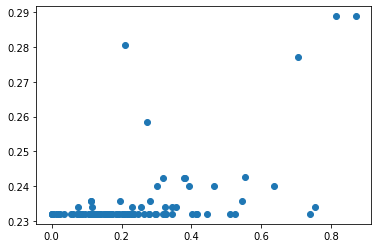

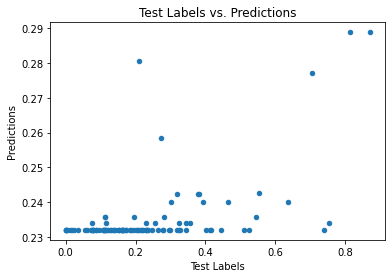

In [36]:
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt

rmse = np.sqrt(MSE(testing_target, predictions))
print("RMSE : % f" %(rmse))
# R2 Computation
import scipy.stats as stats
# print(y_test.tolist())
# print(y_pred_list)
plt.plot(testing_target, predictions, 'o')
plotting_df = pd.DataFrame()
plotting_df['Actual'] = testing_target
plotting_df['Predicted'] = predictions
# plotting_df.to_csv('../data/plotting.csv')
plotting_df.plot(x='Actual', y='Predicted', kind='scatter')

#a, b = np.polyfit(test_with_zeroes, results_zeroes2/100, 1)
#plt.plot(test_with_zeroes, a*test_with_zeroes+b, color='steelblue', linestyle='--', linewidth=2)
slope, intercept, r_value, p_value, std_err = stats.linregress(testing_target, predictions)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value*r_value)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()